In [2]:
import sys
sys.path.append('..')
from MPRA_predict.utils import *

In [2]:
metadata = pd.read_csv('../data/AlphaGenome/alpha_genome_metadata.csv')
metadata

,name,strand,Assay title,ontology_curie,biosample_name,biosample_type,biosample_life_stage,data_source,endedness,genetically_modified,output_type,gtex_tissue,histone_mark,transcription_factor
0,CL:0000084 ATAC-seq,.,ATAC-seq,CL:0000084,T-cell,primary_cell,adult,encode,paired,False,OutputType.ATAC,NaN,NaN,NaN
1,CL:0000100 ATAC-seq,.,ATAC-seq,CL:0000100,motor neuron,in_vitro_differentiated_cells,adult,encode,paired,False,OutputType.ATAC,NaN,NaN,NaN
2,CL:0000236 ATAC-seq,.,ATAC-seq,CL:0000236,B cell,primary_cell,adult,encode,paired,False,OutputType.ATAC,NaN,NaN,NaN
3,CL:0000623 ATAC-seq,.,ATAC-seq,CL:0000623,natural killer cell,primary_cell,adult,encode,paired,False,OutputType.ATAC,NaN,NaN,NaN
4,CL:0000624 ATAC-seq,.,ATAC-seq,CL:0000624,"CD4-positive, alpha-beta T cell",primary_cell,adult,encode,paired,False,OutputType.ATAC,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5558,ENCSR182QNJ,-,PRO-cap,EFO:0001099,Caco-2,cell_line,NaN,encode,NaN,False,OutputType.PROCAP,NaN,NaN,NaN
5559,ENCSR740IPL,-,PRO-cap,EFO:0002067,K562,cell_line,NaN,encode,NaN,False,OutputType.PROCAP,NaN,NaN,NaN
5560,ENCSR797DEF,-,PRO-cap,EFO:0002819,Calu3,cell_line,NaN,encode,NaN,False,OutputType.PROCAP,NaN,NaN,NaN
5561,ENCSR801ECP,-,PRO-cap,CL:0002618,endothelial cell of umbilical vein,primary_cell,NaN,encode,NaN,False,OutputType.PROCAP,NaN,NaN,NaN


In [3]:
metadata['Assay title'].value_counts()

Assay title
TF ChIP-seq           1617
Histone ChIP-seq      1116
total RNA-seq          784
polyA plus RNA-seq     617
hCAGE                  516
DNase-seq              305
ATAC-seq               167
LQhCAGE                 30
in situ Hi-C            24
PRO-cap                 12
Micro-C                  3
Dilution Hi-C            1
Name: count, dtype: int64

In [4]:
metadata['cell_type'] = metadata['biosample_name']
metadata['assay'] = metadata['Assay title']

mask = (metadata['Assay title'] == 'DNase-seq')
metadata.loc[mask, 'assay'] = 'DNase'
mask = (metadata['Assay title'] == 'TF ChIP-seq')
metadata.loc[mask, 'assay'] = metadata.loc[mask, 'transcription_factor']
mask = (metadata['Assay title'] == 'Histone ChIP-seq')
metadata.loc[mask, 'assay'] = metadata.loc[mask, 'histone_mark']

metadata['index'] = metadata.index

In [5]:
df_pivot = metadata.pivot_table(
    values="index", 
    index="cell_type", 
    columns="assay", 
    aggfunc=list,
)

df_pivot

assay,ADNP,AFF1,AFF4,AGO1,AGO2,AHDC1,AHR,AKAP8,ARHGAP35,ARID1B,ARID2,ARID3A,ARID4A,ARID4B,ARID5B,ARNT,ARNT2,ARNTL,ASH1L,ASH2L,ATAC-seq,ATF1,ATF2,ATF3,ATF4,ATF7,ATF7-NPFF,BACH1,BATF,BATF2,BAZ2A,BCL11A,BCL11B,BCL3,BCL6,BCLAF1,BCOR,BHLHE40,BMI1,BORCS8-MEF2B,BRCA1,BRD4,BRD9,BRF2,C11orf30,CAMTA2,CBFA2T2,CBFA2T3,CBFB,CBX1,CBX3,CBX5,CC2D1A,CCDC6,CEBPA,CEBPB,CEBPD,CEBPG,CHAMP1,CHD1,CHD2,CHD4,CLOCK,COPS2,CREB1,CREB3,CREB3L1,CREM,CSRNP1,CTBP1,CTBP2,CTCF,CUX1,CXXC5,Cebpa,DACH1,DDX20,DEAF1,DIDO1,DLX6,DMAP1,DMBX1,DNMT1,DNMT3B,DNase,DPF2,DR1,DRAP1,DZIP1,Dilution Hi-C,E2F1,E2F4,E2F5,E2F6,E2F8,E4F1,EBF1,EEA1,EED,EGR1,EGR2,EHMT2,ELF1,ELF3,ELF4,ELK1,ELK4,EP300,EP400,ERF,ESR1,ESRRA,ETS1,ETV1,ETV4,ETV5,ETV6,EZH2,EZH2phosphoT487,FBXL19,FEZF1,FOS,FOSL1,FOSL2,FOXA1,FOXA2,FOXA3,FOXC1,FOXF2,FOXJ2,FOXJ3,FOXK1,FOXK2,FOXM1,FOXO1,FOXO4,FOXP1,FOXP4,FOXQ1,FUS,GABPA,GABPB1,GATA1,GATA2,GATA3,GATA4,GATAD1,GATAD2A,GATAD2B,GFI1,GLI4,GLIS1,GLIS2,GLYR1,GMEB1,GMEB2,GPBP1L1,GRHL2,GTF2E2,GTF2F1,GTF2I,GZF1,H2AFZ,H2AK5ac,H2BK120ac,H2BK12ac,H2BK15ac,H2BK20ac,H2BK5ac,H3F3A,H3K14ac,H3K18ac,H3K23ac,H3K27ac,H3K27me3,H3K36me3,H3K4ac,H3K4me1,H3K4me2,H3K4me3,H3K56ac,H3K79me1,H3K79me2,H3K9ac,H3K9me1,H3K9me2,H3K9me3,H4K20me1,H4K5ac,H4K8ac,H4K91ac,HBP1,HCFC1,HDAC1,HDAC2,HDAC3,HDGF,HES1,HES4,HHEX,HIC1,HIC2,HINFP,HIVEP1,HLF,HLTF,HMBOX1,HMG20A,HMG20B,HMGA1,HMGA2,HMGXB3,HMGXB4,HNF1A,HNF1B,HNF4A,HNF4G,HNRNPL,HOMEZ,HOXA10,HOXA3,HOXA5,HOXA9,HOXB5,HOXB7,HOXD1,ID3,IKZF1,IKZF2,IKZF3,IKZF5,INSM2,IRF1,IRF2,IRF4,IRF5,IRF9,IRX3,ISL2,JRK,JUN,JUNB,JUND,KAT7,KAT8,KDM1A,KDM2A,KDM3A,KDM4B,KDM5A,KDM5B,KDM6A,KLF1,KLF10,KLF11,KLF12,KLF16,KLF17,KLF4,KLF5,KLF6,KLF7,KLF8,KLF9,KMT2A,KMT2B,L3MBTL2,LARP7,LBX2,LCOR,LCORL,LEF1,LIN54,LQhCAGE,MAFF,MAFG,MAFK,MAX,MAZ,MBD1,MBD2,MCM5,MED1,MED13,MEF2A,MEF2D,MEIS1,MEIS2,MGA,MIER1,MIER2,MIER3,MITF,MIXL1,MLLT1,MLX,MNT,MNX1,MSX2,MTA1,MTA2,MTA3,MTERF2,MTERF4,MTF2,MXD1,MXD3,MXD4,MXI1,MYBL2,MYC,MYNN,MYPOP,MZF1,Micro-C,NACC2,NAIF1,NANOG,NBN,NCOA1,NCOA2,NCOA3,NCOR1,NEUROD1,NFAT5,NFATC1,NFATC3,NFE2,NFE2L1,NFE2L2,NFIA,NFIB,NFIC,NFIL3,NFKB2,NFKBIZ,NFRKB,NFYA,NFYB,NFYC,NKRF,NKX3-1,NONO,NR0B1,NR0B2,NR2C1,NR2C2,NR2F1,NR2F2,NR2F6,NR3C1,NR4A1,NR5A1,NR5A2,NRF1,NRL,ONECUT1,ONECUT2,OSR2,OVOL1,PATZ1,PAX5,PAX8,PAXIP1,PBX1,PBX2,PBX3,PCBP1,PHF20,PHF21A,PHF5A,PHF8,PITX1,PKNOX1,PML,POGK,POGZ,POLR2A,POLR2AphosphoS2,POLR2AphosphoS5,POLR2B,POLR2G,POLR2H,POLR3A,POU2F1,POU2F2,POU5F1,PPARG,PRDM1,PRDM10,PRDM15,PRDM4,PRDM6,PRMT3,PRO-cap,PROX1,RAD21,RAD51,RARA,RB1,RBBP5,RBFOX2,RBM17,RBM22,RBPJ,RCOR1,RCOR2,REL,RELA,RELB,REPIN1,RERE,REST,RFX1,RFX3,RFX5,RFXANK,RFXAP,RNF2,RREB1,RUNX3,RXRA,RXRB,SAFB,SAFB2,SALL1,SALL2,SAP130,SCRT1,SCRT2,SETDB1,SFPQ,SIN3A,SIN3B,SIX1,SIX4,SIX5,SKI,SKIL,SMAD1,SMAD2,SMAD3,SMAD4,SMAD5,SMAD7,SMARCA4,SMARCA5,SMARCB1,SMARCC1,SMARCC2,SMARCE1,SMC3,SMYD3,SNAI1,SNAPC2,SNAPC4,SOX13,SOX15,SOX5,SOX6,SP1,SP2,SP3,SP4,SP5,SP7,SPDEF,SPEN,SPI1,SRF,SRSF1,SRSF9,SRY,SSRP1,STAG1,STAT3,STAT5A,STAT6,SUPT20H,SUPT5H,SUZ12,SYNCRIP,TAF1,TAF7,TAF9B,TAL1,TARDBP,TBL1XR1,TBP,TBX2,TBX21,TBX3,TCF12,TCF3,TCF7,TCF7L2,TEAD1,TEAD4,TFAP4,TFCP2,TFDP1,TFDP2,TFE3,TGIF2,THAP1,THAP11,THAP12,THAP4,THAP7,THAP9,THRA,THRB,TIGD6,TMF1,TOE1,TOPORS,TOX4,TP53,TRIM22,TRIM24,TRIM28,TSC22D2,U2AF1,U2AF2,UBTF,USF1,USF2,VEZF1,WIZ,WT1,XRCC4,XRCC5,YEATS2,YEATS4,YY1,YY2,ZBED1,ZBED4,ZBTB1,ZBTB10,ZBTB11,ZBTB12,ZBTB14,ZBTB17,ZBTB2,ZBTB20,ZBTB21,ZBTB25,ZBTB26,ZBTB3,ZBTB33,ZBTB34,ZBTB37,ZBTB38,ZBTB39,ZBTB4,ZBTB40,ZBTB42,ZBTB43,ZBTB44,ZBTB48,ZBTB6,ZBTB7A,ZBTB7B,ZBTB8A,ZBTB9,ZC3H13,ZC3H4,ZC3H8,ZEB1,ZEB2,ZFHX2,ZFHX3,ZFP1,ZFP36,ZFP36L1,ZFP37,ZFP64,ZFP69B,ZFP82,ZFP90,ZFP91,ZFX,ZFY,ZGPAT,ZHX1,ZHX2,ZIC2,ZIK1,ZKSCAN1,ZKSCAN8,ZMAT3,ZMIZ1,ZMYM2,ZMYM3,ZMYM4,ZNF10,ZNF12,ZNF121,ZNF124,ZNF133,ZNF134,ZNF136,ZNF138,ZNF142,ZNF143,ZNF146,ZNF148,ZNF157,ZNF160,ZNF175,ZNF18,ZNF181,ZNF184,ZNF189,ZNF197,ZNF2,ZNF205,ZNF207,ZNF217,ZNF219,ZNF221,ZNF224,ZNF225,ZNF230,ZNF232,ZNF235,ZNF239,ZNF24,ZNF263,ZNF264,ZNF274,ZNF275,ZNF276,ZNF280B,ZNF280D,ZNF281,ZNF282,ZNF292,ZNF3,ZNF316,ZNF317,ZNF318,ZNF319,ZNF324,ZNF329,ZNF331,ZNF333,ZNF335,ZNF337,ZNF33B,ZNF34,ZNF341,ZNF343,ZN

In [6]:
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']

df_pivot = df_pivot.loc[cell_types, assays]
df_pivot

assay,DNase,H3K4me3,H3K27ac,CTCF
cell_type,,,,
K562,[831],[2082],[2077],[3689]
HepG2,[822],[2028],[2023],"[3065, 3066]"
SK-N-SH,[866],[2201],[2196],[4194]
HCT116,[859],[2155],[2150],"[4128, 4129, 4130, 4131, 4132, 4133, 4134, 413..."
A549,[820],[2016],[2013],[2870]


In [7]:
pred_dnase = load_h5('outputs/Gosai_AlphaGenome_DNase.h5')
print(pred_dnase.shape)

pred_histone = load_h5('outputs/Gosai_AlphaGenome_histone.h5')
print(pred_histone.shape)

MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_my_processed_data_len200_norm.csv')
print(MPRA_df.shape)

(760679, 305)


In [ ]:
for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        if assay == 'DNase':
            indice = df_pivot.loc[cell_type, assay]
            indice = [i-713 for i in indice]
            pred_array = pred_dnase

            if isinstance(indice, list) and len(indice) > 0:
                # for idx in indice:
                #     pred = logit(pred_array[:, idx])
                #     true = MPRA_df[cell_type]
                #     r, _ = pearson(pred, true)
                #     print(cell_type, assay, idx, r)
                pred = pred_array[:, indice].mean(1)
                MPRA_df[f'{cell_type}_{assay}'] = pred
            else:
                MPRA_df[f'{cell_type}_{assay}'] = np.nan

        elif assay in ['H3K4me3', 'H3K27ac']:
            indice = df_pivot.loc[cell_type, assay]
            indice = [i-1685 for i in indice]
            pred_array = pred_histone

            if isinstance(indice, list) and len(indice) > 0:
                # for idx in indice:
                #     pred = logit(pred_array[:, idx])
                #     true = MPRA_df[cell_type]
                #     r, _ = pearson(pred, true)
                #     print(cell_type, assay, idx, r)
                pred = pred_array[:, indice].mean(1)
                MPRA_df[f'{cell_type}_{assay}'] = pred
            else:
                MPRA_df[f'{cell_type}_{assay}'] = np.nan
        
        else:
            MPRA_df[f'{cell_type}_{assay}'] = np.nan
MPRA_df

In [ ]:
pearson_df = pd.DataFrame(dtype=float)

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        pred = MPRA_df[f'{cell_type}_{assay}']
        true = MPRA_df[cell_type]
        r, _ = pearson(pred, true)
        pearson_df.loc[cell_type, assay] = r

pearson_df

In [ ]:
MPRA_df.to_csv('../data/Gosai_MPRA/Gosai_MPRA_seq_feature_alphagenome_raw.csv', index=False)

In [3]:
# normalize

In [3]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_seq_feature_alphagenome_raw.csv')
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_CTCF
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.709,0.027,9.594,5.484,NaN,0.024,5.500,4.406,NaN,0.025,3.938,1.469,NaN,0.027,7.000,13.312,NaN,0.016,7.750,5.016,NaN
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.266,0.030,10.188,5.922,NaN,0.026,5.844,4.781,NaN,0.030,4.297,1.617,NaN,0.029,7.594,14.781,NaN,0.018,8.312,5.422,NaN
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.619,0.018,4.844,5.656,NaN,0.023,6.531,4.406,NaN,0.004,5.938,3.734,NaN,0.024,6.812,6.422,NaN,0.010,7.516,5.203,NaN
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.668,0.018,4.906,5.734,NaN,0.022,6.312,4.469,NaN,0.004,6.297,4.086,NaN,0.024,6.812,6.594,NaN,0.010,8.125,6.031,NaN
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.168,0.006,2.500,3.656,NaN,0.013,4.344,3.344,NaN,0.004,3.797,2.203,NaN,0.014,4.062,4.906,NaN,0.008,5.125,2.258,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.708,1.294,1.077,NaN,NaN,0.164,31.250,16.469,NaN,0.081,17.312,12.406,NaN,0.058,15.219,7.656,NaN,0.116,24.938,41.375,NaN,0.042,22.625,12.812,NaN
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.547,-0.429,NaN,NaN,0.014,3.094,4.305,NaN,0.012,3.359,2.844,NaN,0.005,2.320,1.188,NaN,0.015,3.336,5.016,NaN,0.007,4.141,2.234,NaN
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.146,-0.200,-0.310,NaN,NaN,0.021,4.062,5.656,NaN,0.026,5.062,4.344,NaN,0.006,3.742,2.906,NaN,0.032,5.812,13.531,NaN,0.014,9.969,18.500,NaN
760677,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,-0.119,-0.090,-0.387,NaN,NaN,0.015,3.773,4.703,NaN,0.015,4.023,3.336,NaN,0.005,2.961,1.773,NaN,0.020,4.391,6.031,NaN,0.007,4.609,2.328,NaN


In [4]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_seq_feature_alphagenome_raw.csv')

assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']

cols = [f'{cell_type}_{assay}' for cell_type in cell_types for assay in assays]
x = MPRA_df[cols].copy()
x = np.log1p(x)
MPRA_df[cols] = x

MPRA_df.to_csv('../data/Gosai_MPRA/Gosai_MPRA_seq_feature_alphagenome_log1p.csv', index=False)

In [ ]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_seq_feature_alphagenome_raw.csv')

assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']

cols = [f'{cell_type}_{assay}' for cell_type in cell_types for assay in assays]
x = MPRA_df[cols].copy()
x = np.arcsinh(x)
MPRA_df[cols] = x

MPRA_df.to_csv('../data/Gosai_MPRA/Gosai_MPRA_seq_feature_alphagenome_arcsinh.csv', index=False)

In [32]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_seq_feature_alphagenome_raw.csv')

assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']

cols = [f'{cell_type}_{assay}' for cell_type in cell_types for assay in assays]
x = MPRA_df[cols].copy()
x = np.log1p(x / x.quantile(0.95))
MPRA_df[cols] = x

MPRA_df.to_csv('../data/Gosai_MPRA/Gosai_MPRA_seq_feature_alphagenome_log1p95.csv', index=False)

In [33]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_seq_feature_alphagenome_raw.csv')

assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']

cols = [f'{cell_type}_{assay}' for cell_type in cell_types for assay in assays]
x = MPRA_df[cols].copy()
x = np.log1p(x / x.quantile(0.95))
x = (x - x.mean()) / x.std()
MPRA_df[cols] = x

MPRA_df.to_csv('../data/Gosai_MPRA/Gosai_MPRA_seq_feature_alphagenome_log1p95_zscore.csv', index=False)

In [23]:
class QuantileNormalizer():
    """
    Quantile Normalization transformer (sklearn-style).

    Parameters
    ----------
    axis : int, default=0
        The axis along which to perform quantile normalization.
        - axis=0: normalize columns (samples are rows)
        - axis=1: normalize rows (samples are columns)

    Attributes
    ----------
    reference_ : ndarray of shape (n_features,) or (n_samples,)
        The reference distribution computed during fit.
    """

    def __init__(self, axis=0):
        self.axis = axis
        self.reference_ = None

    def fit(self, X, y=None):
        """
        Compute the reference distribution for quantile normalization.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Input data.
        y : Ignored

        Returns
        -------
        self : object
        """
        X = np.array(X, dtype=float)
        if self.axis == 1:
            X = X.T

        # sort each column and compute average across samples
        sorted_X = np.sort(X, axis=0)
        self.reference_ = np.mean(sorted_X, axis=1)
        return self

    def transform(self, X):
        """
        Apply quantile normalization to X.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)

        Returns
        -------
        X_normalized : ndarray of shape (n_samples, n_features)
        """
        X = np.array(X, dtype=float)
        if self.axis == 1:
            X = X.T

        ranks = np.argsort(np.argsort(X, axis=0), axis=0)
        X_normalized = np.zeros_like(X)
        for j in range(X.shape[1]):
            X_normalized[:, j] = self.reference_[ranks[:, j]]

        if self.axis == 1:
            X_normalized = X_normalized.T
        return X_normalized

In [27]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_seq_feature_alphagenome_raw.csv')

assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
train_cell_types = ['K562', 'HepG2', 'SK-N-SH']
valid_cell_types = ['HCT116', 'A549']

cols = [f'{cell_type}_{assay}' for cell_type in cell_types for assay in assays]
x = MPRA_df[cols].copy()
x = np.log1p(x / x.quantile(0.95))
MPRA_df[cols] = x


for assay in assays:
    QN = QuantileNormalizer(axis=0)
    
    train_cols = [f'{cell_type}_{assay}' for cell_type in train_cell_types]
    x = MPRA_df[train_cols].copy()
    QN.fit(x)
    x = QN.transform(x)
    MPRA_df[train_cols] = x

    valid_cols = [f'{cell_type}_{assay}' for cell_type in valid_cell_types]
    x = MPRA_df[valid_cols].copy()
    x = QN.transform(x)
    MPRA_df[valid_cols] = x

MPRA_df.to_csv('../data/Gosai_MPRA/Gosai_MPRA_seq_feature_alphagenome_log1p95_qn.csv', index=False)

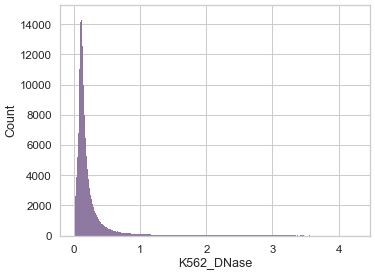

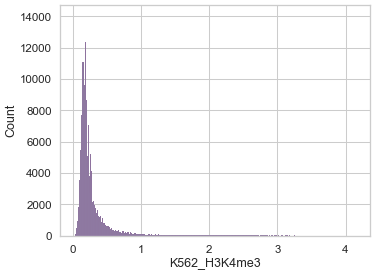

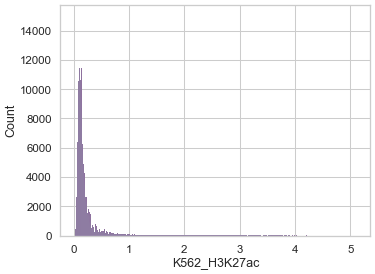

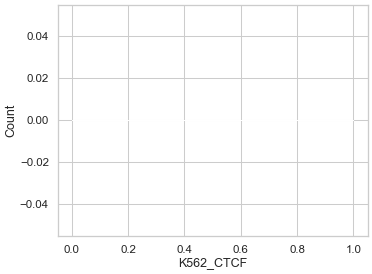

In [30]:
for j, assay in enumerate(assays):
    plt.figure(figsize=(8, 6), dpi=50)
    for i, cell_type in enumerate(cell_types):
        x = MPRA_df[f'{cell_type}_{assay}'].copy()
        sns.histplot(x)

In [31]:
MPRA_df.to_csv('../data/Gosai_MPRA/Gosai_MPRA_seq_feature_alphagenome_log1p95_qn.csv', index=False)

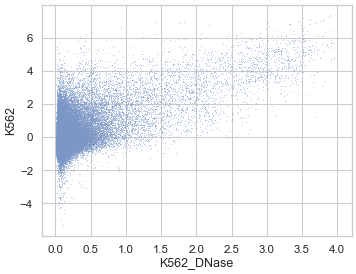

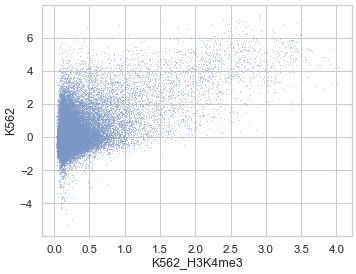

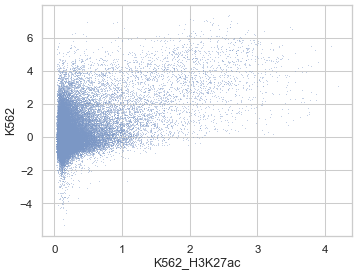

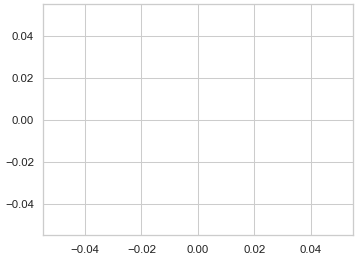

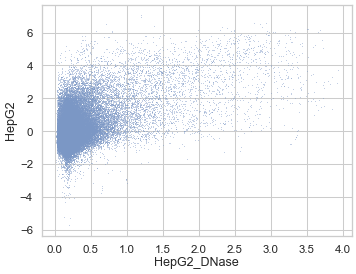

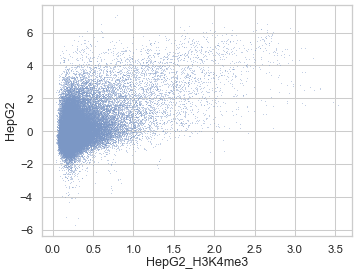

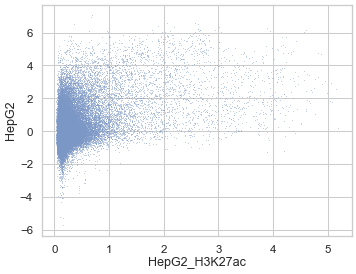

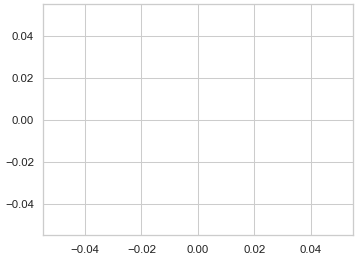

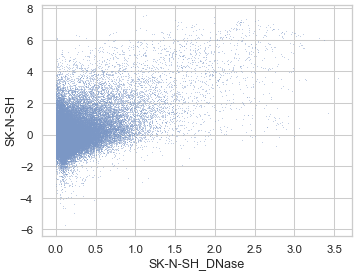

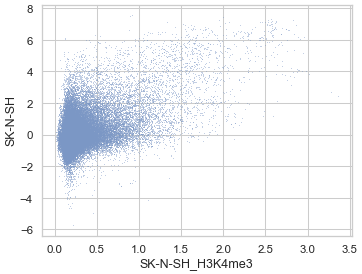

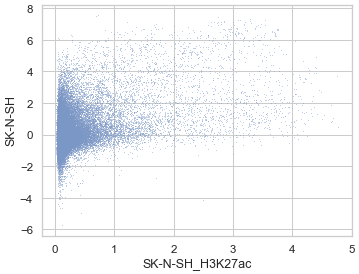

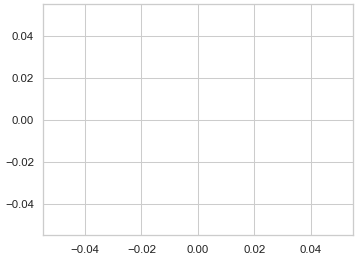

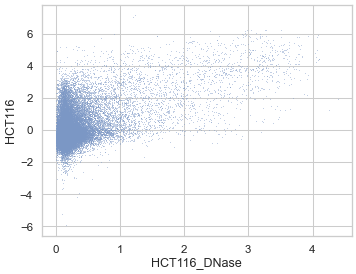

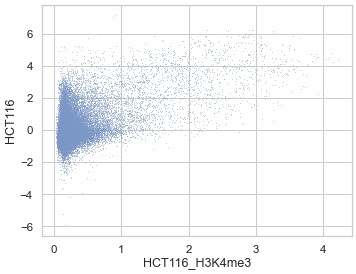

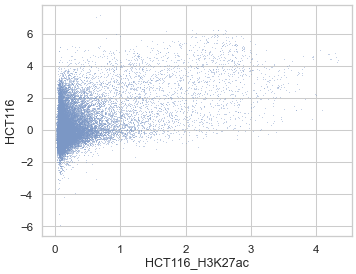

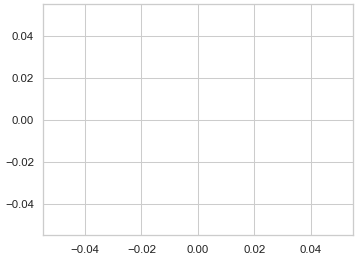

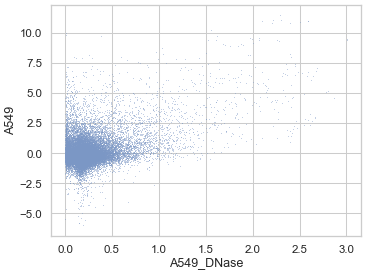

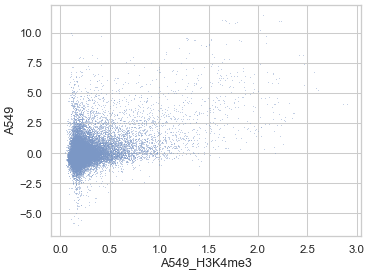

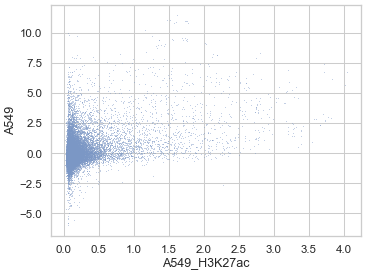

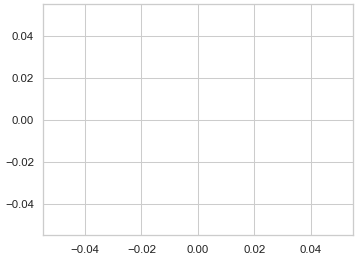

In [20]:
for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        plt.figure(figsize=(8, 6), dpi=50)
        x = MPRA_df[f'{cell_type}_{assay}'].copy()
        y = MPRA_df[f'{cell_type}'].copy()
        sns.scatterplot(x=x[:100000], y=y[:100000], s=1)

In [6]:
# feature_cols = [f'{cell_type}_{assay}' for cell_type in cell_types for assay in assays]
# x = MPRA_df[feature_cols].copy()
# x = np.log(1+x)
# x = (x - x.mean()) / x.std()
# MPRA_df[feature_cols] = x

In [10]:
feature_cols = [f'{cell_type}_{assay}' for cell_type in cell_types for assay in assays]

# x = MPRA_df[feature_cols].copy()
# x = np.log(1+x)
# MPRA_df[feature_cols] = x

from sklearn.preprocessing import QuantileTransformer
x = MPRA_df[feature_cols].copy()
transformer = QuantileTransformer(n_quantiles=10000, output_distribution="normal")
x_trans = transformer.fit_transform(x)
MPRA_df[feature_cols] = x_trans
# quantile归一化会抹除较大信号的数值差异，导致相关性下降，虽然后面的模型可能会重新发现这个规律

/home/hxcai/anaconda3/envs/torch/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


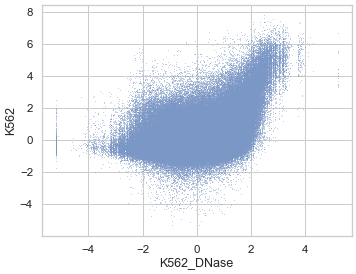

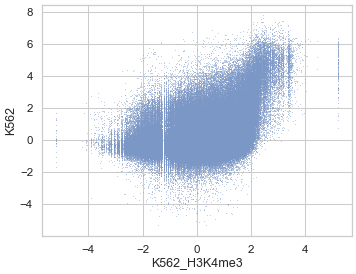

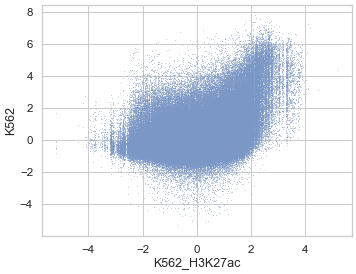

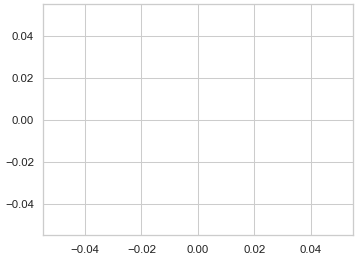

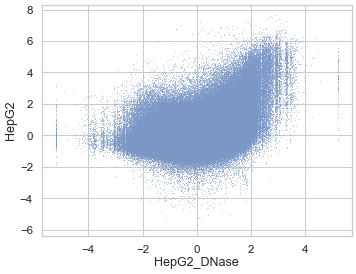

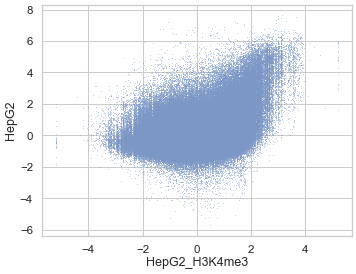

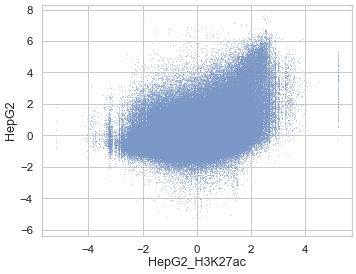

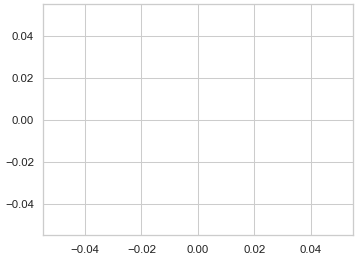

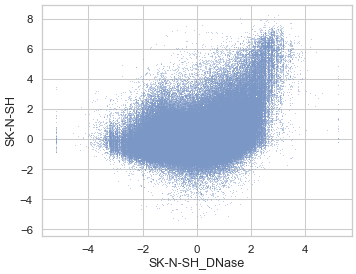

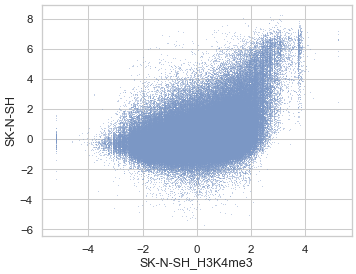

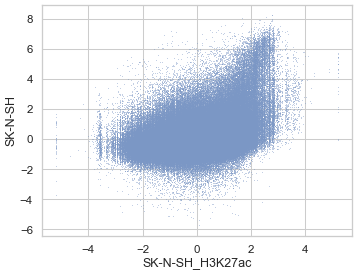

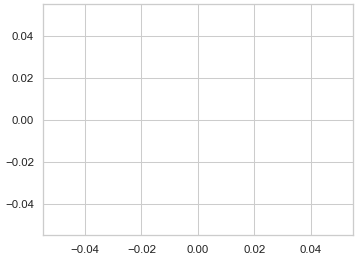

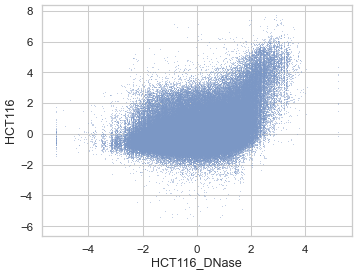

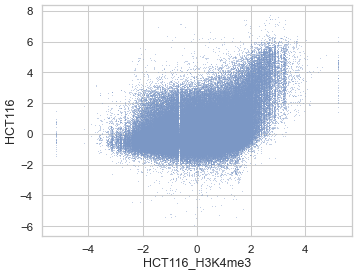

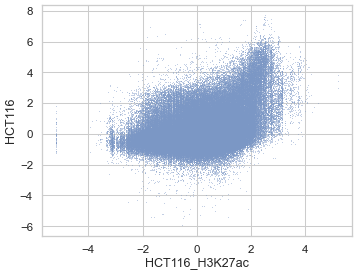

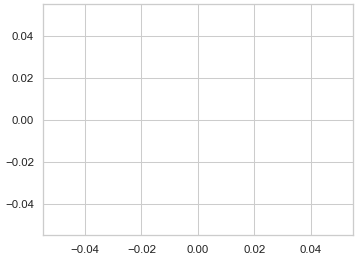

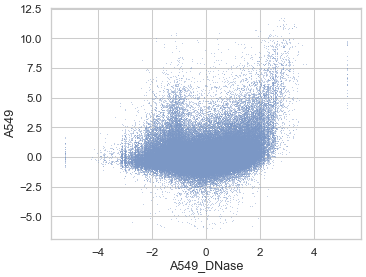

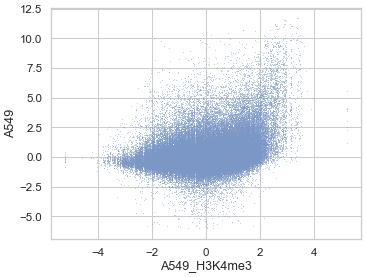

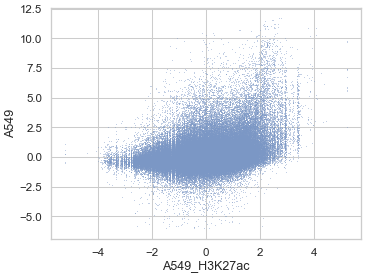

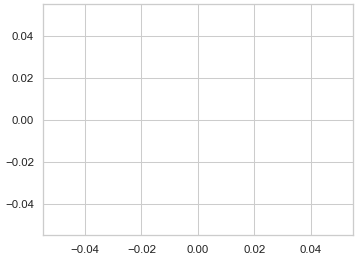

In [12]:
for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        plt.figure(figsize=(8, 6), dpi=50)
        x = MPRA_df[f'{cell_type}_{assay}'].copy()
        y = MPRA_df[f'{cell_type}'].copy()
        sns.scatterplot(x=x, y=y, s=1)

In [13]:
pearson_df = pd.DataFrame(dtype=float)

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        df = MPRA_df
        pred = df[f'{cell_type}_{assay}']
        true = df[cell_type]
        r, _ = pearson(pred, true)
        pearson_df.loc[cell_type, assay] = r

pearson_df

after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan
after remove nan, len(x) < 2, pearson = nan


,DNase,H3K4me3,H3K27ac,CTCF
K562,0.414,0.397,0.376,NaN
HepG2,0.402,0.385,0.383,NaN
SK-N-SH,0.357,0.409,0.391,NaN
HCT116,0.392,0.394,0.406,NaN
A549,0.224,0.306,0.322,NaN


In [14]:
MPRA_df.to_csv('../data/Gosai_MPRA/Gosai_MPRA_seq_feature_quantile_norm.csv', index=False)